In [1]:
!pip install -U pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 11.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
import pandas as pd

train = pd.read_pickle("/content/drive/MyDrive/aml mini project/train100c5k_v2.pkl")
# sampling input data to 10 percent of original size
# train = train.sample(frac=0.5, random_state=5)
X = train["data"]
Y = train["target"]


# New Section

In [3]:
#Spltitting the train and test data with test size as 20 percent of the total data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 , random_state=3)
len(X_train)

400000

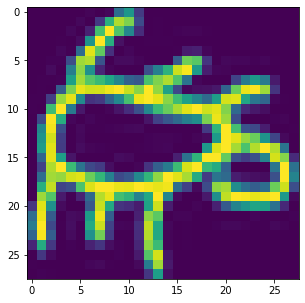

In [4]:
# Plotting a random image data
import matplotlib.pyplot as plt

def image_plot(data, index):
    plt.figure(figsize = (30,5))
    plt.imshow(X[index])

     
image_plot(X, 100)


In [5]:
# imports for building our cnn network structure
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,RandomFlip,RandomRotation
from keras.models import Sequential
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import accuracy_score

num_classes = len(y_train.value_counts())


# Reshaping the input images in the train data X and test data X from (28,28) to (28,28,1) where 1 represents the gray scale color schema and converting it to float
X_train = np.array([i.reshape(28,28,1) for i in X_train])
X_train = X_train.astype('float32')
X_test = np.array([i.reshape(28,28,1) for i in X_test])
X_test = X_test.astype('float32')



# Normalisation of the input data by dividing it by 255 to get the values between 0 and 1
X_train /= 255
X_test /= 255


# Encoding the output data into categorical data to include the categories as different classes using np_utils
print("Total classes in the train data : ", num_classes)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)





Total classes in the train data :  100


In [ ]:

EPOCHS = 6
BATCH_SIZE = 250
INPUT_SHAPE =(28,28,1)
KERNEL_SIZE = (3,3)
POOL_SIZE = (2,2)

# building a linear seqential model with few levels of convolutional models followed by fully connected hidden layer and output layer
CNN_model = Sequential()

# convolutional layer - 1
CNN_model.add(Conv2D(16, kernel_size=KERNEL_SIZE,input_shape=INPUT_SHAPE,strides=(1,1), padding='valid', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPool2D(pool_size=POOL_SIZE))

# convolutional layer - 2
CNN_model.add(Conv2D(32, kernel_size=KERNEL_SIZE,input_shape=INPUT_SHAPE,strides=(1,1), padding='valid', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPool2D(pool_size=POOL_SIZE))




# Adding the fully connected layer - flatten the resultant feature map to a 1-dimensional tensor 
CNN_model.add(Flatten())
# Creating the fully connected layer with  hidden nodes
CNN_model.add(Dense(500, activation='relu'))
CNN_model.add(Dense(300, activation='relu'))
CNN_model.add(Dense(200, activation='relu'))
CNN_model.add(Dense(100, activation='relu'))



# output layer - output layer will have 100 nodes in order to predict the correct class out of the 100 classes
CNN_model.add(Dense(num_classes, activation='softmax'))



# Compiling the model
CNN_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model fby specifying the epochs and batch size
CNN_model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, Y_test))


Epoch 1/6
1600/1600 [==============================] - 265s 164ms/step - loss: 1.8894 - accuracy: 0.5278 - val_loss: 1.5357 - val_accuracy: 0.6042
Epoch 2/6
1600/1600 [==============================] - 261s 163ms/step - loss: 1.3623 - accuracy: 0.6440 - val_loss: 1.3802 - val_accuracy: 0.6434
Epoch 3/6
 884/1600 [===============>..............] - ETA: 1:48 - loss: 1.2154 - accuracy: 0.6775

In [ ]:
CNN_model.save('/content/drive/MyDrive/Colab Notebooks/model_chravi.h5')